In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
Dg = nx.read_graphml("NFL-2022-02-15.graphml")

# Degree

In [50]:
degreeDict = nx.degree_centrality(Dg)

In [51]:
degreeArray = []

for key, value in dict(Dg.out_degree()).items():
    degreeArray.append([key, value])
degreeDF = pd.DataFrame(degreeArray, columns=["screen_name", "degree"])

degreeDF = degreeDF.sort_values(by="degree", ascending=False)
degreeDF.head(10)

,screen_name,degree
1089,Brother_nfts,1543
85,Endzone_Brasil,1173
1020,1218Sports,519
986,jollenelevid,488
588,OddsCheckerUS,482
1779,WCoastScouting,473
433,UndergroundBrks,342
105,nflextra,282
118,nflrums,254
1175,ShibaNFTXRPL,250


In [52]:
'''fig, ax = plt.subplots(1, 1, figsize=(10, 8))

pos = nx.spring_layout(Dg, seed=12345679, k=0.3)
color = list(dict(degreeDict).values())

nx.draw_networkx_edges(Dg, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

nodes = nx.draw_networkx_nodes(Dg, 
                               pos=pos, 
                               node_color=color, 
                               cmap=plt.cm.jet, 
                               ax=ax)

#nx.draw_networkx_labels(g_degreeTop, pos=pos, font_color="black", ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.savefig("degree.png", transparent=True, dpi=300)
plt.show()'''

'fig, ax = plt.subplots(1, 1, figsize=(10, 8))\n\npos = nx.spring_layout(Dg, seed=12345679, k=0.3)\ncolor = list(dict(degreeDict).values())\n\nnx.draw_networkx_edges(Dg, \n                       pos=pos, \n                       alpha=0.4, \n                       ax=ax)\n\nnodes = nx.draw_networkx_nodes(Dg, \n                               pos=pos, \n                               node_color=color, \n                               cmap=plt.cm.jet, \n                               ax=ax)\n\n#nx.draw_networkx_labels(g_degreeTop, pos=pos, font_color="black", ax=ax)\n\nplt.axis("off")\nplt.colorbar(nodes)\nplt.savefig("degree.png", transparent=True, dpi=300)\nplt.show()'

# Closeness

In [53]:
closenessDict = nx.closeness_centrality(Dg)

In [54]:
closenessArray = []

for key, value in dict(closenessDict).items():
    closenessArray.append([key, value])
closenessDF = pd.DataFrame(closenessArray, columns=["screen_name", "closeness"])

closenessDF = closenessDF.sort_values(by="closeness", ascending=False)
closenessDF.head(10)

,screen_name,closeness
2513,theffrobot,0.002398
2267,touchdownbot,0.002323
1297,nflttbr,0.002244
2899,topfanscorner,0.001436
9041,NFLdeutsch,0.001346
13797,TITTHJB,0.001088
21064,Margari62004809,0.001039
10626,madisonlake606,0.001028
4041,SportsCardBOT,0.000987
6289,Sabrina63967774,0.000967


# Betweenness

In [55]:
betweennessDict = nx.betweenness_centrality(Dg)

In [56]:
betweennessArray = []

for key, value in dict(betweennessDict).items():
    betweennessArray.append([key, value])
betweennessDF = pd.DataFrame(betweennessArray, columns=["screen_name", "betweenness"])

betweennessDF = betweennessDF.sort_values(by="betweenness", ascending=False)
betweennessDF.head(10)

,screen_name,betweenness
4400,PatriotsGirlUSA,7.486278e-06
7596,PTSportsFix,7.233750e-06
9100,GoodOldBoysFF,2.403368e-06
80,Broadwayhatpod,2.201420e-06
2899,topfanscorner,2.083275e-06
9402,PeterSaverio,1.825413e-06
4019,sportingbuzz_,1.343033e-06
6292,PigskinPapers,1.232857e-06
11658,ELONONE3,9.464163e-07
12680,AATSports_,8.631894e-07


# EigenVector Centrality

In [57]:
eigenvectorDict = nx.eigenvector_centrality(Dg)

In [58]:
eigenvectorArray = []

for key, value in dict(eigenvectorDict).items():
    eigenvectorArray.append([key, value])
eigenvectorDF = pd.DataFrame(eigenvectorArray, columns=["screen_name", "eigenvector"])

eigenvectorDF = eigenvectorDF.sort_values(by="eigenvector", ascending=False)
eigenvectorDF.head(10)

,screen_name,eigenvector
13797,TITTHJB,0.264651
18184,Paul_Ryan15,0.203792
9403,MikePrE57,0.202336
13294,SportsTimeHQ,0.190476
3296,LogoHog,0.181380
7754,FIToday_,0.181380
10426,ChiefCFS,0.181380
17290,NFLProPicks,0.173513
11096,JNforsports,0.170853
12663,sportsblisswit1,0.170853


# Análise Bivariada

In [59]:
degree_sequence = sorted([d for n, d in Dg.degree()], reverse=True)

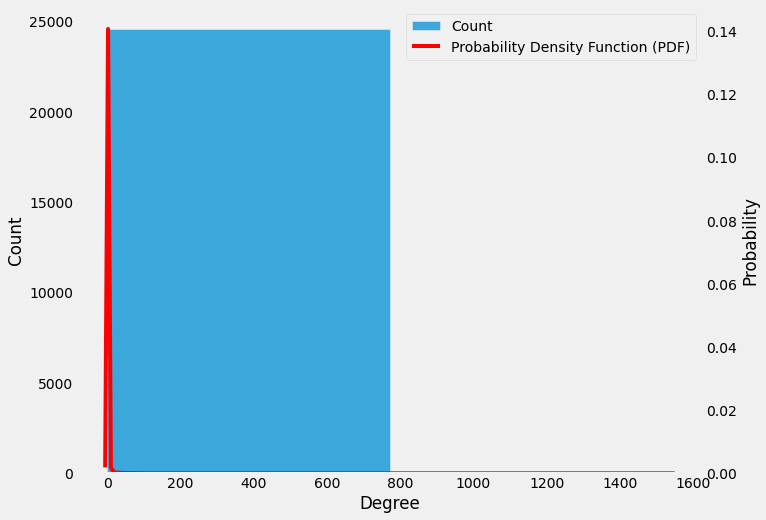

In [60]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=2,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# Análise Multivariada

In [61]:
Dg.remove_edges_from(nx.selfloop_edges(Dg))

In [62]:
bc = pd.Series(betweennessDict)
dc = pd.Series(degreeDict)
ec = pd.Series(eigenvectorDict)
cc = pd.Series(closenessDict)

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.0,0.000041,4.618851e-12,0.000000
1,0.0,0.000041,6.466392e-11,0.000041
2,0.0,0.000163,4.618851e-12,0.000000
3,0.0,0.000041,6.466392e-11,0.000041
4,0.0,0.000041,4.618851e-12,0.000000


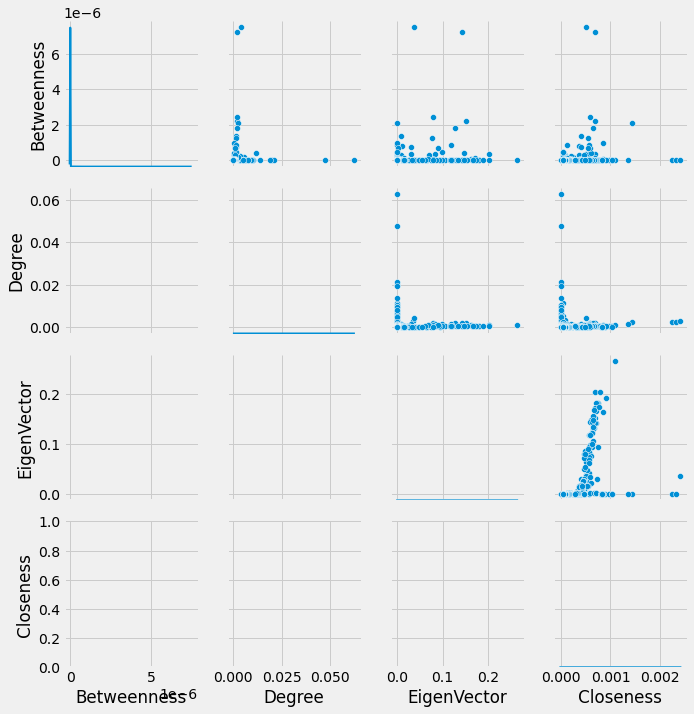

In [63]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_diag(sns.kdeplot, lw=2, legend=False)
#fig.map_lower(sns.kdeplot, cmap="Reds_r")

plt.savefig('multi.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

# Análise de Decomposição

In [64]:
set([v for k,v in nx.core_number(Dg).items()])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


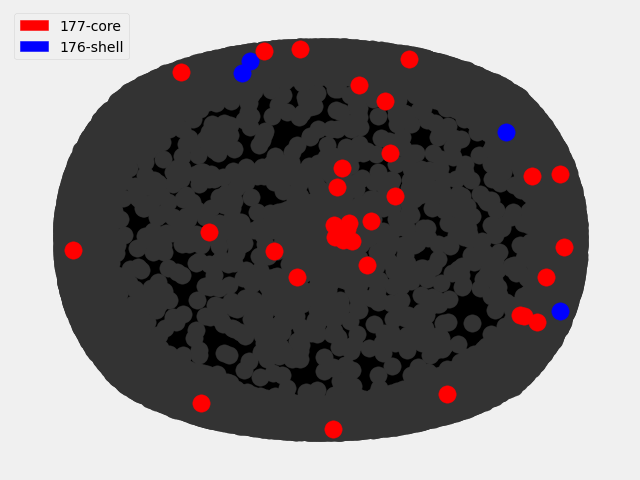

In [65]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g_core_10 = nx.k_shell(Dg, 10)
g_core_11 = nx.k_core(Dg, 11)

# layout position
pos = nx.spring_layout(Dg,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(Dg,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(Dg,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g_core_10,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g_core_11,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='177-core')
blue_patch = mpatches.Patch(color='blue', label='176-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core.png', transparent=True,dpi=600)
plt.show()

In [66]:
list(g_core_10)

['WeeklyAudible', 'wendellwallace', 'JeffWarnerNFL', 'vegasfeverpod']

In [67]:
list(g_core_11)

['ChiefCFS',
 'TITTHJB',
 'FranchiseTagUK',
 'FinSports2',
 'ToTheHizzy',
 'SportsTimeHQ',
 'FIToday_',
 'MintSports',
 'FANTASYBROZ1',
 'JNforsports',
 'sportsblisswit1',
 'TMSMpodcast',
 'bellyupmdffshow',
 'Broadwayhatpod',
 'PTSportsFix',
 'AdamHulseSports',
 '3rdShortPod',
 'Rbloss64',
 'PigskinPapers',
 'LogoHog',
 'PeterSaverio',
 'CHUBZBURGER',
 'AATBirds',
 'joes_talk',
 'UnderCentrePod',
 'NFLProPicks',
 'AATSports_',
 'Paul_Ryan15',
 'GoodOldBoysFF',
 'DSM_Media',
 'MikePrE57',
 'JakesFFootball']